In [1]:
import os
import astropy.units as u
from reduction_phangs_hst import contsub_qa, contsub_misc, contsub_postprocess
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define the galaxy
galaxy_dir = 'ngc1566'
galaxy_cat = 'ngc1566'
galaxy = 'ngc1566'

# Define the filters
halpha_filter = 'f658n'
cont1_filter = 'f555w'
cont2_filter = 'f814w'

# Define the directories
inputdir_hst = '../hst/'
inputdir_muse = '../muse/'
inputdir_root = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies'

# Define input files for QA 
input_nebulae_mask_filename = '%s/data_misc/muse_catalouge/NGC1566_nebulae_mask_V2.fits' %inputdir_root
input_nebulae_catalog_filename = '%s/data_misc/muse_catalouge/Nebulae_catalogue_v2.fits' %inputdir_root

In [3]:
inputdir_hstcontsub = '%s/data/%s/hst_contsub' %(inputdir_root, galaxy_dir)
input_dir = '%s/%s_%s_%s/' % (inputdir_hstcontsub, halpha_filter, cont1_filter, cont2_filter) 
output_dir = '%s/%s_%s_%s_qa/' % (inputdir_hstcontsub, halpha_filter, cont1_filter, cont2_filter) 
contsub_misc.create_directory(output_dir)  

[INFO] Directory '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data/ngc1566/hst_contsub/f658n_f555w_f814w_qa/' already exists.


In [4]:
fits_dict = contsub_qa.read_fits_files(input_dir, input_nebulae_mask_filename, galaxy)
table_nebcat = contsub_qa.process_muse_catalouge(input_nebulae_catalog_filename, galaxy_cat)

Opening existing nebulae mask...
Reading nebulae catalog: /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/muse_catalouge/Nebulae_catalogue_v2.fits


In [5]:
flux_muse = contsub_qa.process_nebulae_flux(fits_dict['nebmask_muse'], fits_dict['musehalpha'], table_nebcat)
flux_hst = contsub_qa.process_nebulae_flux(fits_dict['nebmask_hst'], fits_dict['halpha'], table_nebcat)
flux_hst_bgsub = contsub_qa.process_nebulae_flux(fits_dict['nebmask_hst'], fits_dict['halpha_bgsub'], table_nebcat)
flux_hst_bgsub_an = contsub_qa.process_nebulae_flux(fits_dict['nebmask_hst'], fits_dict['halpha_bgsub_fit_anchored'], table_nebcat)
flux_hst_bgsub_an_int = contsub_qa.process_nebulae_flux(fits_dict['nebmask_hst'], fits_dict['halpha_bgsub_fit_anchored_intnegs'], table_nebcat)
flux_hst_bgsub_an_int_cos = contsub_qa.process_nebulae_flux(fits_dict['nebmask_hst'], fits_dict['halpha_bgsub_fit_anchored_intnegs_nocosmic'], table_nebcat)
flux_hst_bgsub_an_int_cos_nnet = contsub_qa.process_nebulae_flux(fits_dict['nebmask_hst'], fits_dict['halpha_bgsub_fit_anchored_intnegs_nocosmic_nnet'], table_nebcat)

  0%|          | 0/2404 [00:00<?, ?it/s]

  0%|          | 0/2404 [00:00<?, ?it/s]

  0%|          | 0/2404 [00:00<?, ?it/s]

  0%|          | 0/2404 [00:00<?, ?it/s]

  0%|          | 0/2404 [00:00<?, ?it/s]

  0%|          | 0/2404 [00:00<?, ?it/s]

  0%|          | 0/2404 [00:00<?, ?it/s]

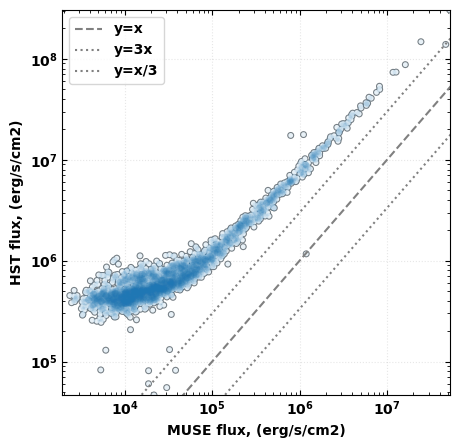

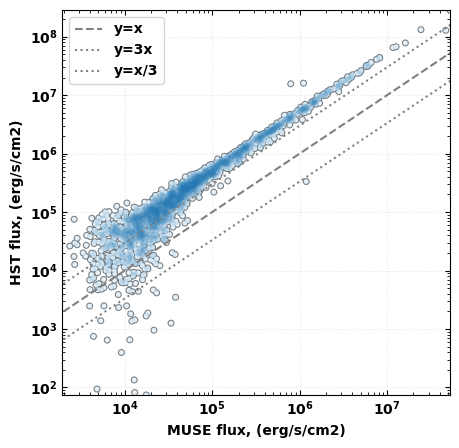

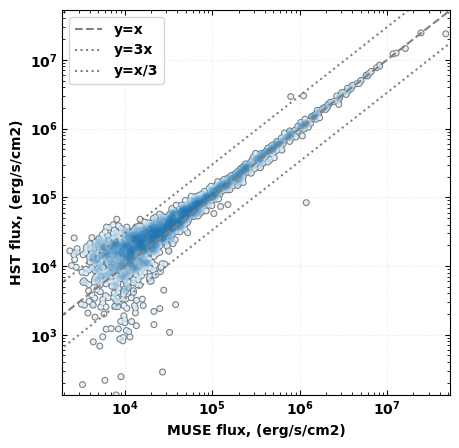

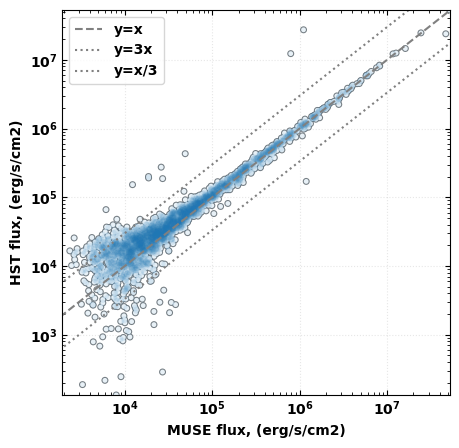

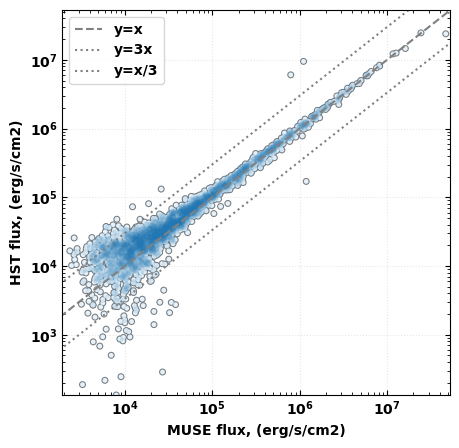

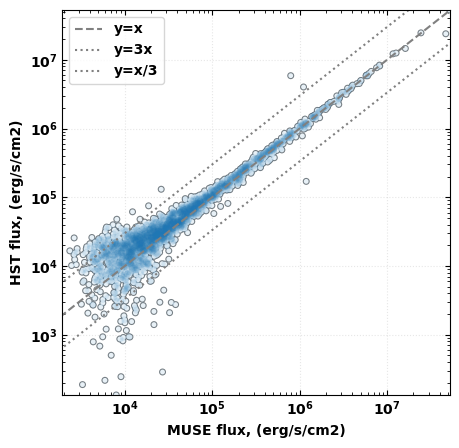

In [6]:
contsub_qa.plot_flux_comparison(flux_muse, flux_hst, f'{output_dir}_catalogueflux_muse_hst.pdf')
contsub_qa.plot_flux_comparison(flux_muse, flux_hst_bgsub, f'{output_dir}_catalogueflux_muse_hst_bgsub.pdf')
contsub_qa.plot_flux_comparison(flux_muse, flux_hst_bgsub_an, f'{output_dir}_catalogueflux_muse_hst_bgsub_an.pdf')
contsub_qa.plot_flux_comparison(flux_muse, flux_hst_bgsub_an_int, f'{output_dir}_catalogueflux_muse_hst_bgsub_an_int.pdf')
contsub_qa.plot_flux_comparison(flux_muse, flux_hst_bgsub_an_int_cos, f'{output_dir}_catalogueflux_muse_hst_bgsub_an_int_cos.pdf')
contsub_qa.plot_flux_comparison(flux_muse, flux_hst_bgsub_an_int_cos_nnet, f'{output_dir}{galaxy}_catalogueflux_muse_hst_bgsub_an_int_cos_nnet.pdf')

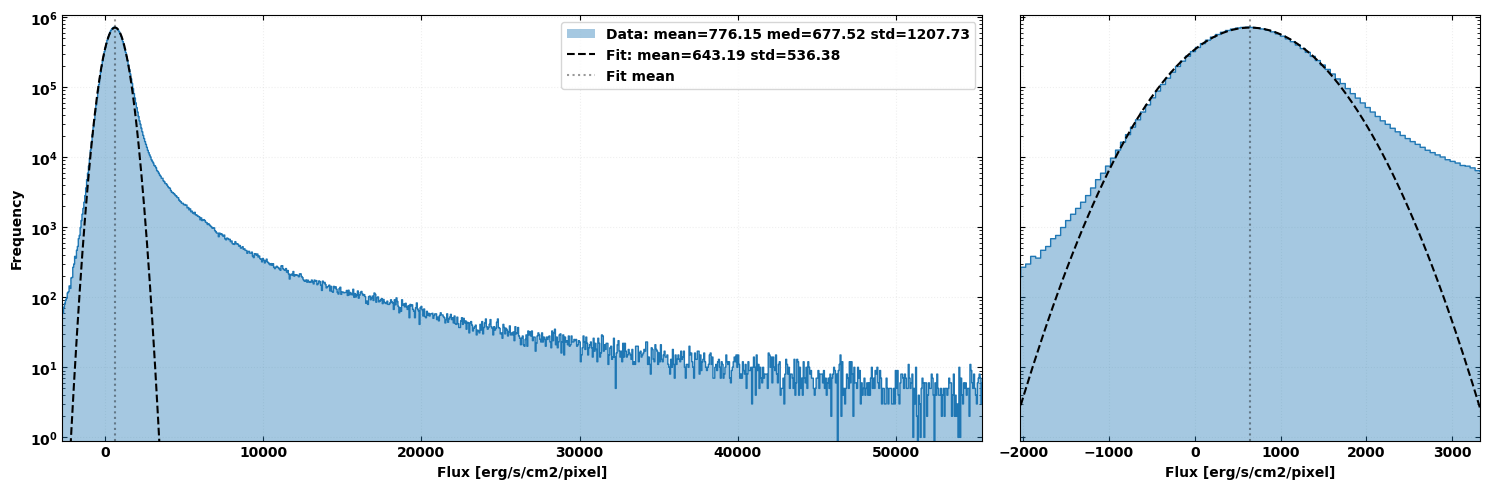

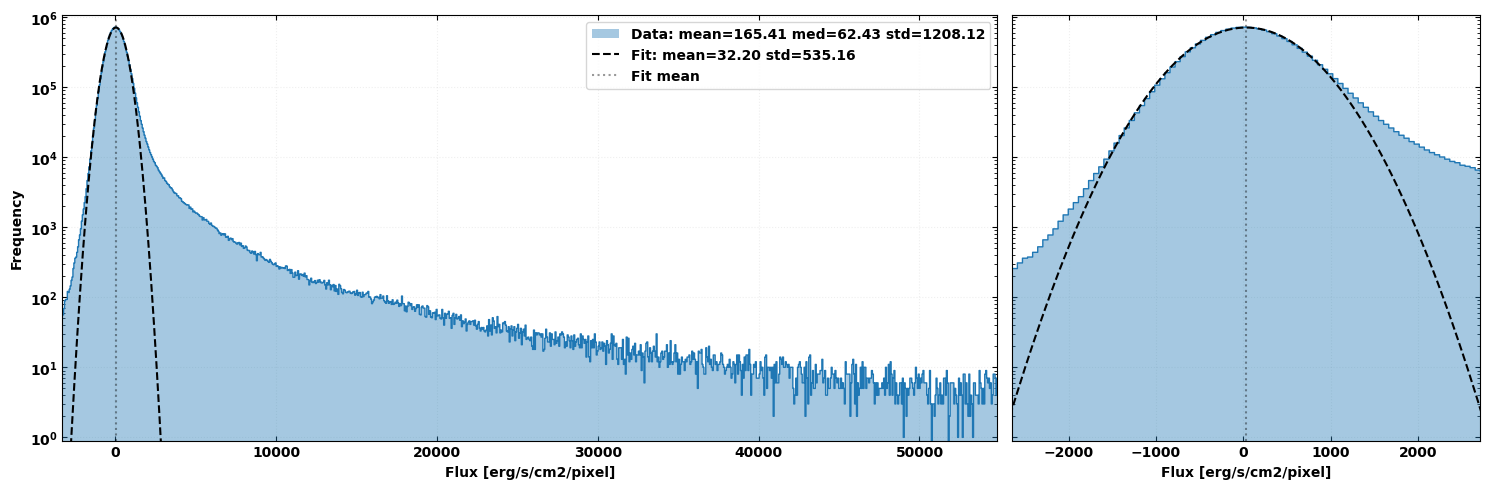

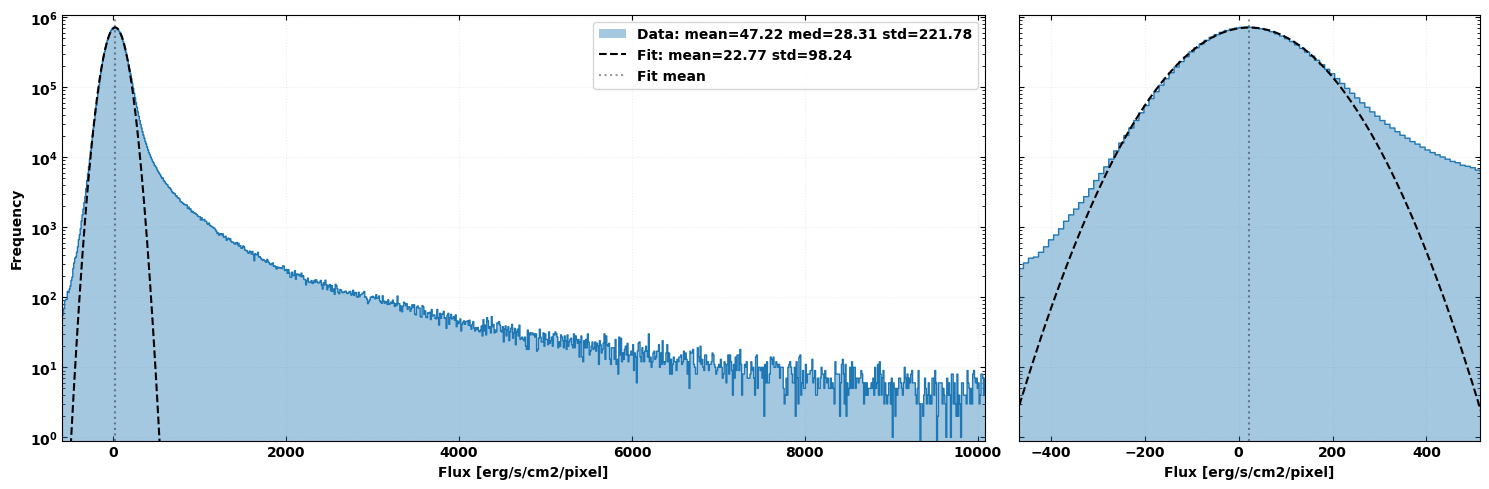

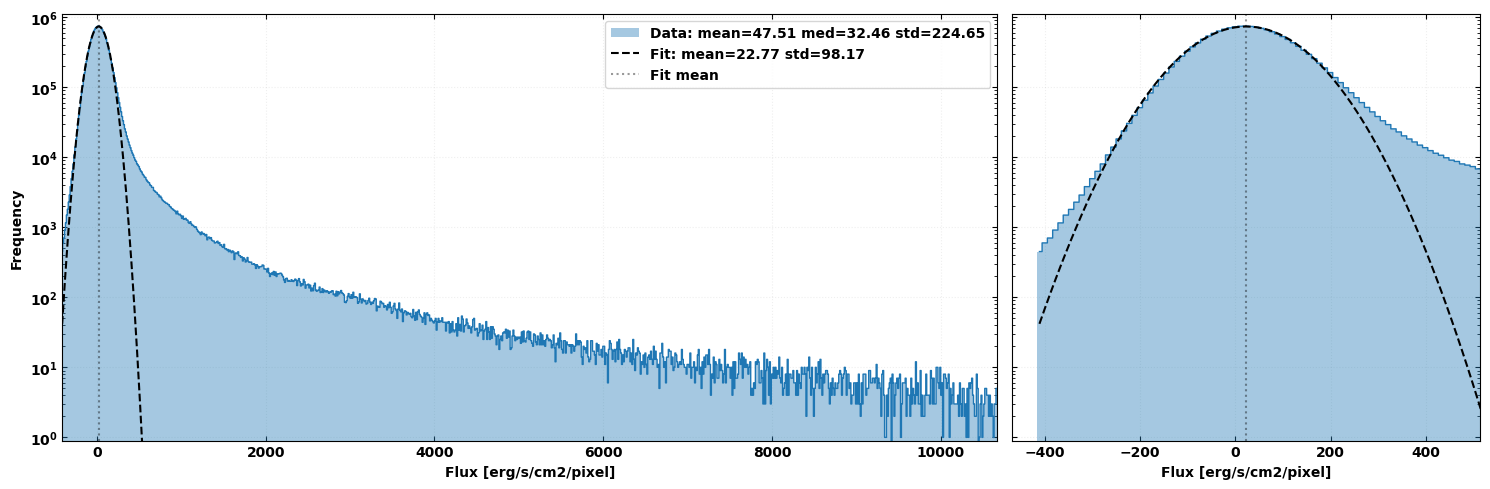

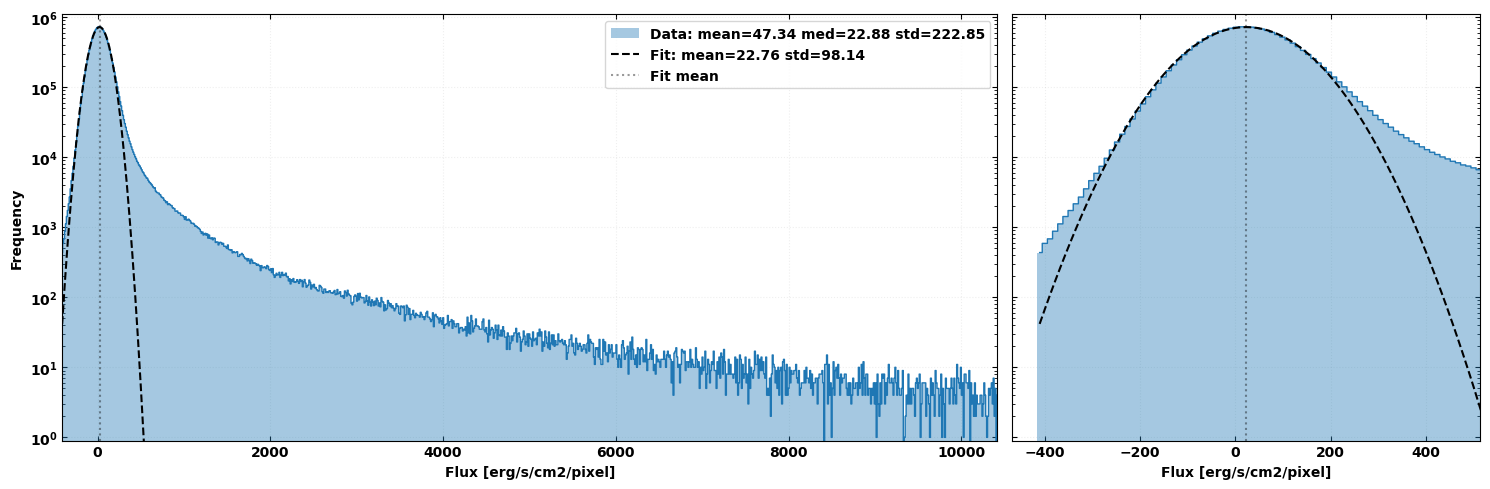

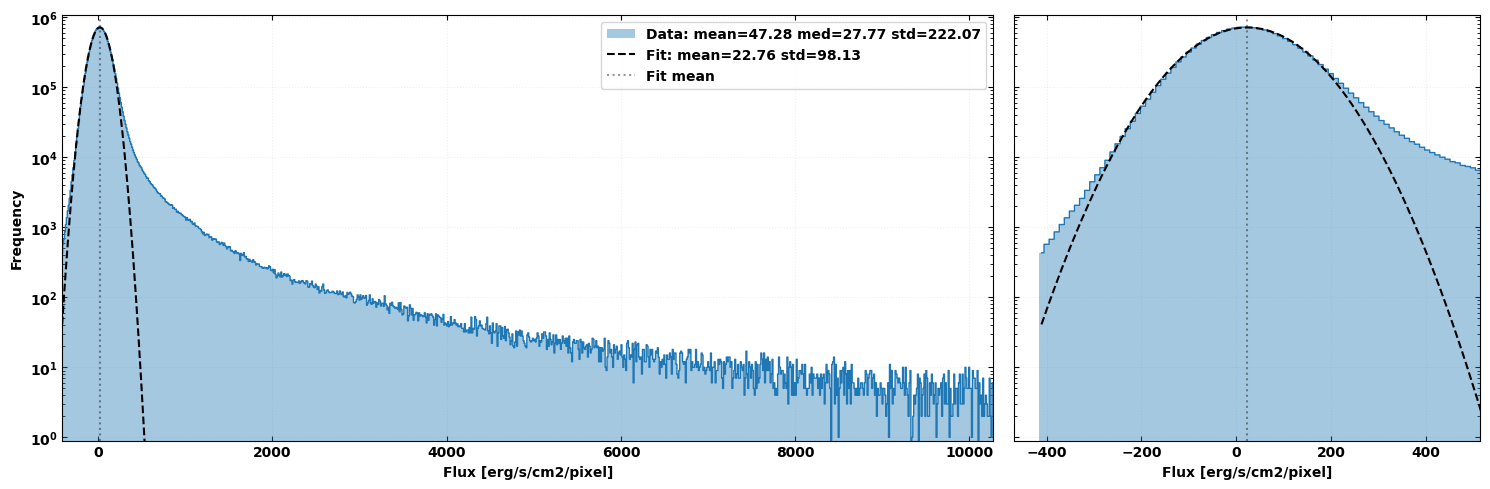

In [7]:
contsub_qa.run_histogram(fits_dict['halpha'], f'{output_dir}{galaxy}_hist_hst.pdf')
contsub_qa.run_histogram(fits_dict['halpha_bgsub'], f'{output_dir}{galaxy}_hist_hst_bgsub.pdf')
contsub_qa.run_histogram(fits_dict['halpha_bgsub_fit_anchored'], f'{output_dir}{galaxy}_hist_hst_bgsub_an.pdf')
contsub_qa.run_histogram(fits_dict['halpha_bgsub_fit_anchored_intnegs'], f'{output_dir}{galaxy}_hist_hst_bgsub_an_int.pdf')
contsub_qa.run_histogram(fits_dict['halpha_bgsub_fit_anchored_intnegs_nocosmic'], f'{output_dir}{galaxy}_hist_hst_bgsub_an_int_cos.pdf')
contsub_qa.run_histogram(fits_dict['halpha_bgsub_fit_anchored_intnegs_nocosmic_nnet'], f'{output_dir}{galaxy}_hist_hst_bgsub_an_int_cos_nnet.pdf')

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

()

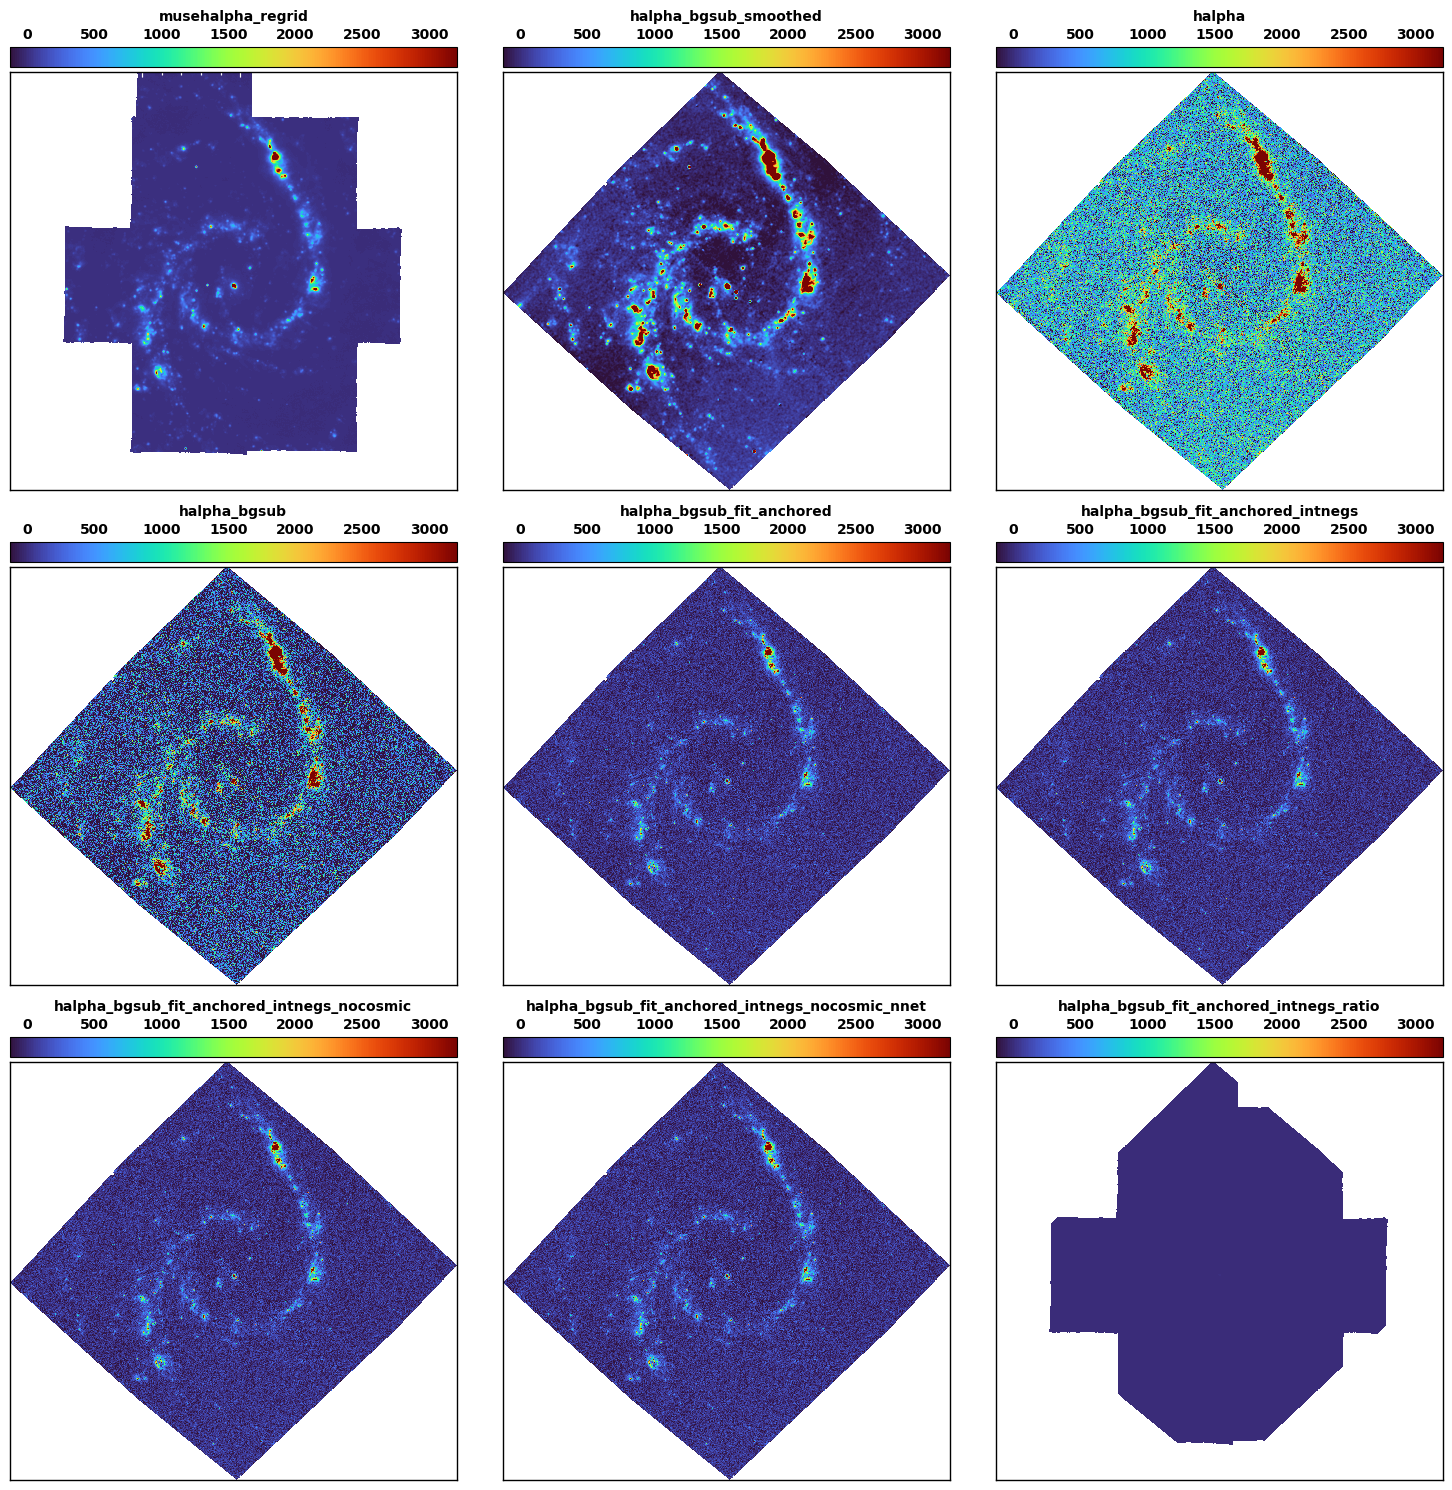

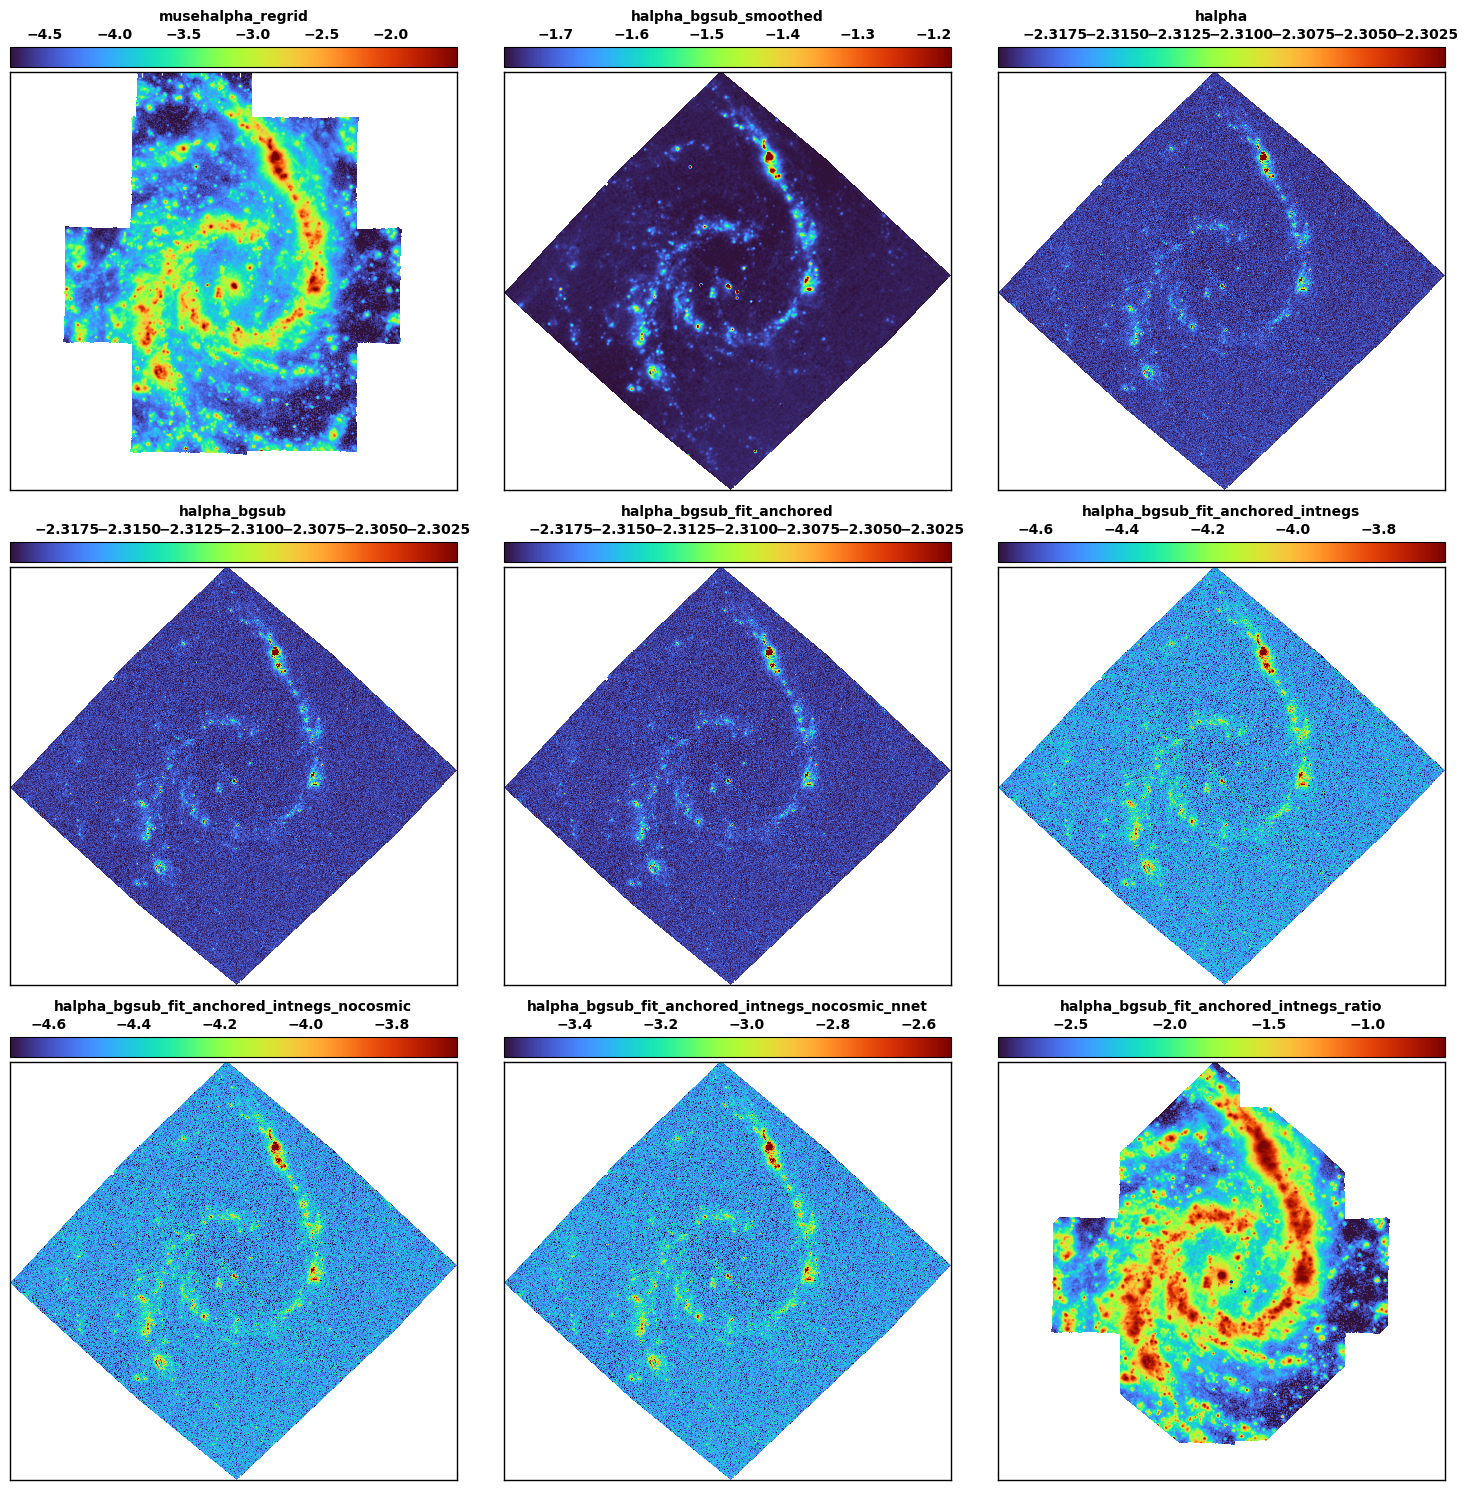

In [8]:
contsub_qa.plot_map(fits_dict, f'{output_dir}{galaxy}_maps.pdf')
contsub_qa.plot_map(fits_dict, f'{output_dir}{galaxy}_maps.pdf', norm=True)